# Scaled Regression Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import r2_score
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
regress_data = pd.read_csv(open("all_features_scaled.csv", 'r'), encoding='utf-8', engine='c')

In [3]:
print(regress_data)

     Unnamed: 0 company_name     Series  Total_Likes  Total_Retweets  \
0             0      1stdibs  _Series_C          230             134   
1             2    365Scores  _Series_B           15              23   
2             3         36Kr  _Series_C           58              21   
3             4      6fusion  _Series_B            2              28   
4             5       6sense  _Series_A           42              43   
..          ...          ...        ...          ...             ...   
875        1198       lmbang  _Series_B           21              39   
876        1199          m6d  _Series_C           45              51   
877        1204  onefinestay  _Series_A           14              42   
878        1205  onefinestay  _Series_B           24             105   
879        1209        vWise  _Series_D           59              70   

     Series_Amount                 Market  tweet_count  get_dayrange  \
0         15000000         Semiconductors          213         

In [4]:
regress_data = regress_data.drop('is_Series_A_scaled', 1)
regress_data = regress_data.drop('is_Series_B_scaled', 1)
regress_data = regress_data.drop('is_Series_C_scaled', 1)
regress_data = regress_data.drop('is_Series_D_scaled', 1)
regress_data['Series'] = [val[1:] for val in list(regress_data['Series'])]
regress_data['i_Series_A'] = 1 * (regress_data.Series == 'Series_A')
regress_data['i_Series_B'] = 1 * (regress_data.Series == 'Series_B')
regress_data['i_Series_C'] = 1 * (regress_data.Series == 'Series_C')
regress_data['i_Series_D'] = 1 * (regress_data.Series == 'Series_D')
regress_data = regress_data.iloc[:,48:]
regress_data = regress_data.replace([np.inf, -np.inf], 0)
regress_data.fillna(0, inplace=True)

C:\Users\anush\AppData\Local\Temp\ipykernel_36616\3423805989.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  regress_data = regress_data.drop('is_Series_A_scaled', 1)
C:\Users\anush\AppData\Local\Temp\ipykernel_36616\3423805989.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  regress_data = regress_data.drop('is_Series_B_scaled', 1)
C:\Users\anush\AppData\Local\Temp\ipykernel_36616\3423805989.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  regress_data = regress_data.drop('is_Series_C_scaled', 1)
C:\Users\anush\AppData\Local\Temp\ipykernel_36616\3423805989.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  regress_data = regress

In [5]:
# Break it into test and train
itrain, itest = train_test_split(range(regress_data.shape[0]), train_size=0.9)
mask=np.ones(regress_data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)
regress_train = regress_data[mask]
regress_test = regress_data[~mask]

# Break it into series A, series B, series C, series D
regress_test_A = regress_test[regress_test['i_Series_A'] == 1]
regress_train_A = regress_train[regress_train['i_Series_A'] == 1]
regress_test_B = regress_test[regress_test['i_Series_B'] == 1]
regress_train_B = regress_train[regress_train['i_Series_B'] == 1]
regress_test_C = regress_test[regress_test['i_Series_C'] == 1]
regress_train_C = regress_train[regress_train['i_Series_C'] == 1]
regress_test_D = regress_test[regress_test['i_Series_D'] == 1]
regress_train_D = regress_train[regress_train['i_Series_D'] == 1]

regress_train.head()

,Total_Likes_scaled,Total_Retweets_scaled,Series_Amount_scaled,tweet_count_scaled,get_dayrange_scaled,get_dayiqr_scaled,likes_mean_scaled,retweets_mean_scaled,persontag_count_mean_scaled,hashtag_count_mean_scaled,...,is_Mobile_scaled,is_Web Hosting_scaled,mean_neg_scaled,mean_pos_scaled,total_neg_scaled,total_pos_scaled,i_Series_A,i_Series_B,i_Series_C,i_Series_D
0,5.490499,14.639506,131.530705,5.604621,2.919821,2.166753,0.277495,0.444905,0.514837,0.459289,...,0.0,0.0,0.023806,0.041962,0.009406,0.055760,0,0,1,0
1,2.785031,6.249428,106.686057,5.315116,0.711572,0.702672,0.075718,0.117218,0.381770,0.515318,...,0.0,0.0,0.015238,0.033029,0.005780,0.006125,0,1,0,0
2,4.104487,5.957199,31.280916,5.379401,5.260371,4.079996,0.269588,0.248310,0.273717,0.316081,...,0.0,0.0,0.023102,0.038169,0.026871,0.053475,0,0,1,0
3,1.100562,6.919969,112.210509,5.404103,6.859861,5.382639,0.011017,0.128725,0.386229,0.296625,...,0.0,0.0,0.016218,0.028414,0.000000,0.000000,0,1,0,0
4,3.784122,8.582139,125.565735,5.614763,4.495134,3.431288,0.132559,0.178719,0.408271,0.307725,...,0.0,0.0,0.021695,0.042527,0.012933,0.067520,1,0,0,0


In [6]:
# Create stats for each of the funding rounds
def find_stats(funding, label):
    print('------------------------------------')
    print('Round: ' + label)
    amounts = funding['Series_Amount_scaled']
    print('Mean ' + str(np.mean(amounts)))
    print('StDev ' + str(np.std(amounts)))  
    
# Helps visualize the log of the funding rounds
def create_log_plot(regress_train_A, regress_train_B, regress_train_C, regress_train_D):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    fig.tight_layout()
    round_title = ['Series A Funding Amounts', 'Series B Funding Amounts', 'Series C Funding Amounts', 'Series D Funding Amounts']
    rounds = [regress_train_A, regress_train_B, regress_train_C, regress_train_D]
    for ax, i in zip(axes.ravel(), range(len(rounds))):
        funding = np.log((list(rounds[i]['Series_Amount_scaled'])))
        ax.hist(funding, color='green', alpha=0.2)
        ax.set_title(round_title[i])

# Visualizes the residuals of the funding rounds
def plot_residuals(errors):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
    fig.tight_layout()
    axes.hist(errors, color='green', alpha=0.2)
    axes.set_title('Residual Analysis')

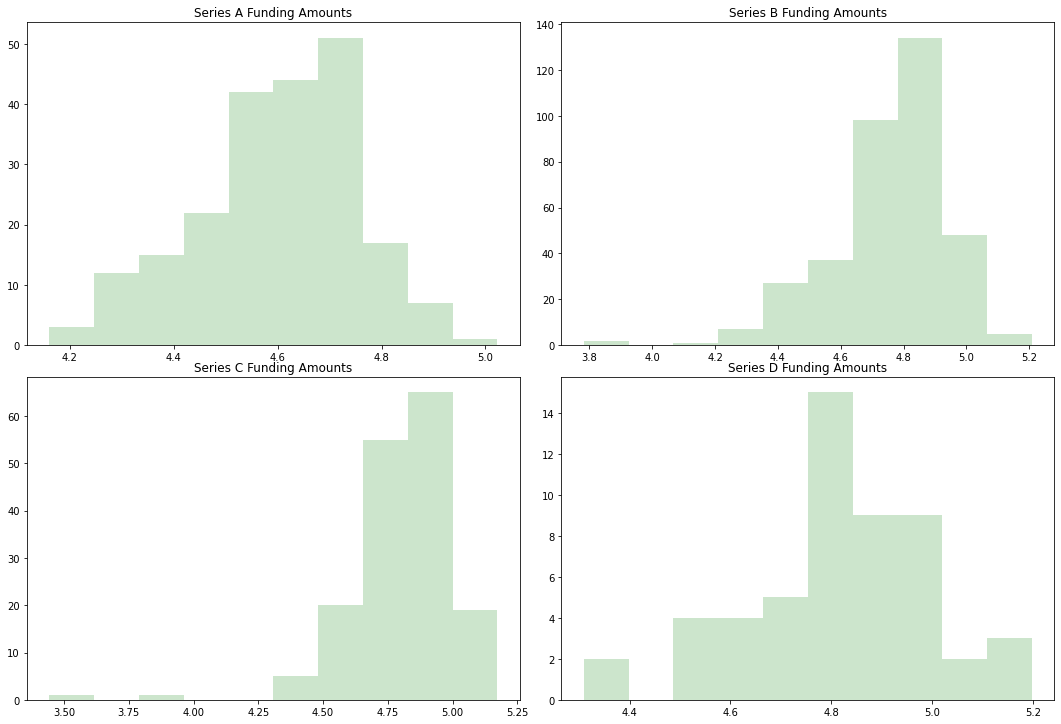

In [7]:
 create_log_plot(regress_train_A, regress_train_B, regress_train_C, regress_train_D)

In [8]:
features = list(regress_train_D.columns)
#features.remove('Market')
features.remove('Series_Amount_scaled')

X_train = np.asmatrix(regress_train[features])
X_test = np.asmatrix(regress_test[features])
y_train = np.asmatrix(regress_train['Series_Amount_scaled'].apply(lambda val: val)).T
y_test = np.asmatrix(regress_test['Series_Amount_scaled'].apply(lambda val: val)).T


# Scaled Ridge Regression

In [9]:
vdict = {}
rdict = {}
kf = KFold()
for a in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    for cv_train, cv_test in kf.split(y_train):
        lin_model_r = Ridge(alpha=a)
        lin_model_r.fit(X_train[cv_train], y_train[cv_train])
        y_pred = np.asmatrix(lin_model_r.predict(X_train[cv_test])).T
        mse = (mean_squared_error(y_train[cv_test], y_pred.T)**(0.5))
        vdict[a] = mse
        rdict[a] = lin_model_r
        
best_a = min(vdict, key=vdict.get)
best_ridge_model =rdict[best_a]

print('Cross validation MSE values: ' + str(vdict))
print('Best a from cross validation: ' + str(best_a))

Cross validation MSE values: {0.001: 21.191365513460564, 0.01: 21.019557835612435, 0.1: 20.733800551476538, 1: 20.64065473331951, 10: 20.545019469951555, 100: 20.731080588877322, 1000: 21.753601629562688, 10000: 22.30485539625861}
Best a from cross validation: 10


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/re

In [10]:
len(y_pred.T)

158

In [11]:
y_pred = np.asmatrix(best_ridge_model.predict(X_test)).T
mse = (mean_squared_error(y_test, y_pred.T)**(0.5))
baseline_mean = np.log(np.asmatrix(np.mean(regress_test['Series_Amount_scaled']) * np.ones(y_test.shape[0]))).T

print('RMSE for Ridge Regression: ' + str(mse))
print('Baseline by predicting averages RMSE: ' + str(mean_squared_error(y_test, baseline_mean)**(0.5)))

RMSE for Ridge Regression: 19.900012516631264
Baseline by predicting averages RMSE: 112.19172918678039


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/re

R Squared: 0.06859372564351951


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


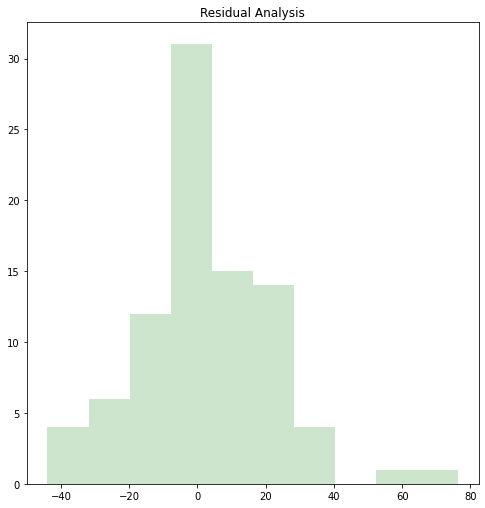

In [12]:
plot_residuals(y_test-y_pred.T)
print('R Squared: ' + str(r2_score(y_test, y_pred.T)))

# Scaled Lasso Regression

In [13]:
vdict = {}
rdict = {}
kf = KFold()
for a in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    for cv_train, cv_test in kf.split(y_train):
        lin_model_r = Lasso(alpha=a)
        lin_model_r.fit(X_train[cv_train], y_train[cv_train])
        y_pred = np.asmatrix(lin_model_r.predict(X_train[cv_test])).T
        mse = (mean_squared_error(y_train[cv_test], y_pred)**(0.5))
        vdict[a] = mse
        rdict[a] = lin_model_r
        
best_a = min(vdict, key=vdict.get)
best_lasso_model =rdict[best_a]

print('Cross validation MSE values: ' + str(vdict))
print('Best a from cross validation: ' + str(best_a))

c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Cross validation MSE values: {0.001: 20.966570136308988, 0.01: 20.69813615938733, 0.1: 20.50810581795972, 1: 20.65579514797901, 10: 22.527454248063716, 100: 22.884315356116673, 1000: 22.884315356116673, 10000: 22.884315356116673}
Best a from cross validation: 0.1


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.100e+03, tolerance: 2.820e+01
  model = cd_fast.enet_coordinate_descent(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: h

In [14]:
y_pred = np.asmatrix(best_lasso_model.predict(X_test)).T
mse = (mean_squared_error(y_test, y_pred)**(0.5))
baseline_mean = np.log(np.asmatrix(np.mean(regress_test['Series_Amount_scaled']) * np.ones(y_test.shape[0]))).T

print('RMSE for Lasso Regression: ' + str(mse))
print('Baseline by predicting averages RMSE: ' + str(mean_squared_error(y_test, baseline_mean)**(0.5)))

c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/re

RMSE for Lasso Regression: 20.03564412214998
Baseline by predicting averages RMSE: 112.19172918678039


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


R Squared: 0.05585417257039493


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


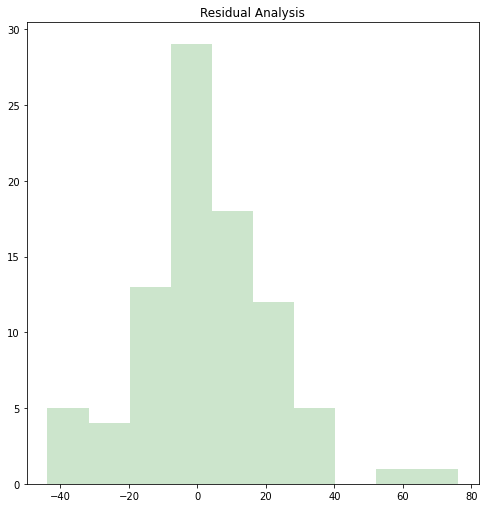

In [15]:
plot_residuals(y_test-y_pred)
print('R Squared: ' + str(r2_score(y_test, y_pred)))